<h1 style="color:red">CAB FARE PREDICTION

## Import libraries and load dataset 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Read Data Set

In [2]:
traindf = pd.read_csv('cab.csv', na_values={"pickup_datetime":"43"})


## EDA

In [3]:
traindf.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
traindf.tail(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
16057,5,2013-01-31 15:46:00 UTC,-73.963582,40.774242,-73.956525,40.783952,6.0
16058,5.5,2014-04-19 14:58:57 UTC,-73.974265,40.756048,-73.980885,40.746838,2.0
16059,5.3,2010-01-03 18:26:00 UTC,-73.973297,40.743768,-73.986060,40.730768,3.0
16060,22,2014-10-01 09:15:00 UTC,-73.954582,40.778047,-74.005982,40.742117,1.0
16061,10.9,2009-05-20 18:56:42 UTC,-73.994191,40.751138,-73.962769,40.769719,1.0
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0
16066,8.5,2011-12-14 06:24:33 UTC,-74.002111,40.729755,-73.983877,40.761975,NaN


In [5]:
traindf.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [6]:
traindf.shape

(16067, 7)

In [7]:
traindf.size

112469

In [8]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16066 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [9]:
traindf.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [10]:
traindf.isnull()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
16062,False,False,False,False,False,False,False
16063,False,False,False,False,False,False,False
16064,False,False,False,False,False,False,False
16065,False,False,False,False,False,False,False


In [11]:
traindf.isnull().values.any()

True

In [12]:
traindf.isnull().values.sum()

80

In [13]:
traindf.isnull().sum()

fare_amount          24
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [14]:
df = traindf

In [15]:
df["fare_amount"].fillna("No ", inplace= True)
print(df.isnull().sum())

fare_amount           0
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64


<AxesSubplot: >

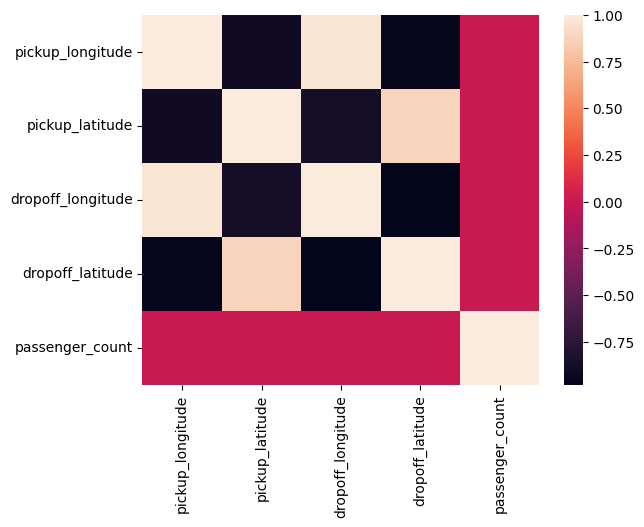

In [16]:
sns.heatmap(traindf.corr())

## Data cleaning

In [17]:
traindf.isna().sum()

fare_amount           0
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [18]:
traindf.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


### Changing the dtype

In [19]:
traindf['fare_amount'] = pd.to_numeric(traindf['fare_amount'], errors='coerce')

In [20]:
traindf['pickup_datetime'] = pd.to_datetime(traindf['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

### Extract Hour, Date, Day, Month, Year

In [21]:
traindf['Hour'] = traindf['pickup_datetime'].dt.hour
traindf['minute'] = traindf['pickup_datetime'].dt.minute
traindf['date'] = traindf['pickup_datetime'].dt.day
traindf['day'] = traindf['pickup_datetime'].dt.dayofweek
traindf['month'] = traindf['pickup_datetime'].dt.month
traindf['year'] = traindf['pickup_datetime'].dt.year

In [22]:
traindf.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,minute,date,day,month,year
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,17.0,26.0,15.0,0.0,6.0,2009.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,16.0,52.0,5.0,1.0,1.0,2010.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,0.0,35.0,18.0,3.0,8.0,2011.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,4.0,30.0,21.0,5.0,4.0,2012.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,7.0,51.0,9.0,1.0,3.0,2010.0


## Handle missing values

#### SimpleImputer

### drop null row from pickup_datetime

In [23]:
traindf.drop(traindf[traindf['pickup_datetime'].isna()].index, inplace=True)

In [24]:
traindf.drop('pickup_datetime', axis=1, inplace=True)

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#apply it to features

imputer.fit(traindf[['fare_amount','passenger_count']])
traindf[['fare_amount','passenger_count']] = imputer.transform(traindf[['fare_amount','passenger_count']])

In [26]:
traindf.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Hour                 0
minute               0
date                 0
day                  0
month                0
year                 0
dtype: int64

In [27]:
traindf.shape

(16066, 12)

<AxesSubplot: ylabel='passenger_count'>

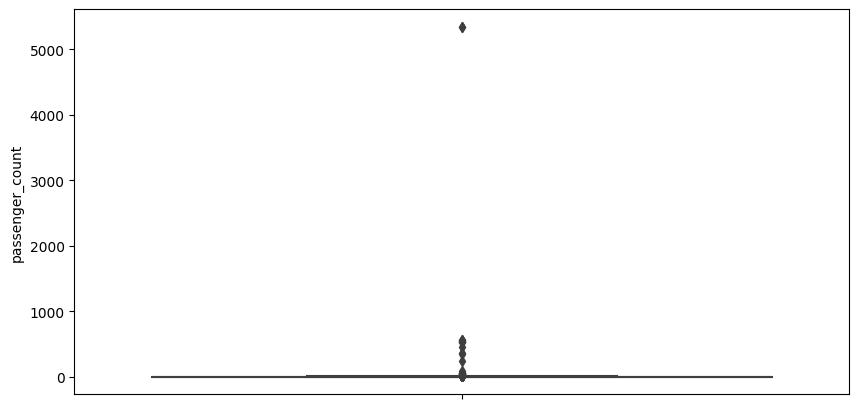

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['passenger_count'])

<AxesSubplot: ylabel='fare_amount'>

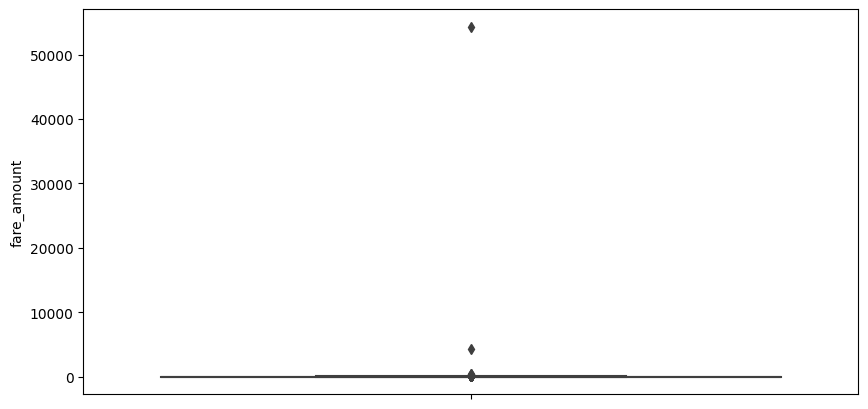

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['fare_amount'])

## Detecting Outlier


In [77]:
max_thresold = traindf['passenger_count'].quantile(0.98)
max_thresold

5.0

In [78]:
traindf[traindf['passenger_count']>max_thresold]

,fare_amount,passenger_count,Hour,minute,date,day,month,year,distance
38,9.0,6,11,42,24,6,11,2013,2.343802
60,5.0,6,10,57,16,2,7,2014,0.430871
63,7.0,6,9,12,1,3,5,2014,1.447958
67,16.5,6,18,28,29,1,4,2014,3.733208
68,11.5,6,10,19,12,6,4,2015,3.374713
...,...,...,...,...,...,...,...,...,...
15825,5.3,6,10,10,18,4,11,2011,1.096010
15898,4.5,6,3,26,24,6,6,2012,1.082437
15941,24.5,6,17,25,29,1,10,2013,4.675052
16007,17.5,6,12,3,27,1,5,2014,3.257941


In [32]:
min_thresold = traindf['passenger_count'].quantile(0.05)
min_thresold

1.0

In [33]:
traindf[traindf['passenger_count']<min_thresold]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,minute,date,day,month,year
314,34.0,-73.974899,40.751095,-73.908546,40.881878,0.00,23.0,16.0,2.0,1.0,6.0,2015.0
566,4.9,-73.955322,40.782840,-73.955797,40.773673,0.00,21.0,33.0,28.0,5.0,1.0,2012.0
678,6.5,-73.983397,40.738183,-73.971395,40.758023,0.00,7.0,24.0,27.0,0.0,2.0,2012.0
1160,13.3,-73.998360,40.740348,-73.946455,40.777348,0.00,23.0,58.0,25.0,2.0,5.0,2011.0
1935,10.1,-73.971400,40.795000,-73.967900,40.768600,0.00,11.0,9.0,23.0,6.0,10.0,2011.0
2200,8.1,-73.988008,40.748303,-74.005185,40.738733,0.00,16.0,54.0,23.0,0.0,5.0,2011.0
2425,8.9,-73.999900,40.738600,-73.971800,40.746300,0.00,22.0,47.0,25.0,4.0,11.0,2011.0
3034,5.7,-73.986557,40.745783,-73.994545,40.729995,0.00,12.0,3.0,6.0,6.0,3.0,2011.0
3413,7.3,-73.973413,40.743708,-73.985220,40.741583,0.00,6.0,39.0,28.0,0.0,2.0,2011.0
3481,11.3,-73.968100,40.762500,-73.984400,40.760900,0.00,17.0,23.0,30.0,2.0,11.0,2011.0


## Remove outlier

In [34]:
Q1 = traindf['passenger_count'].quantile(0.25)
Q3 = traindf['passenger_count'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('Lower :',lower)
print('Upper :',upper)

Lower : -0.5
Upper : 3.5


#### 1. Remove passenger_count less than zero and with more than 6

In [35]:
traindf['passenger_count'].sort_values(ascending=True).head(10)

13742    0.0
2425     0.0
6575     0.0
5150     0.0
4248     0.0
5058     0.0
9159     0.0
3413     0.0
4114     0.0
15514    0.0
Name: passenger_count, dtype: float64

In [36]:
traindf.drop(traindf[traindf['passenger_count'] > 6 ].index, inplace = True)
traindf.drop(traindf[traindf['passenger_count'] < 0 ].index, inplace = True)
traindf.drop(traindf[traindf['passenger_count'] == 0.12 ].index, inplace = True)
traindf.drop(traindf[traindf['passenger_count'].isna() ].index, inplace = True)

#### 2. Remove fare_amount less than zero and greater than 454

In [37]:
traindf['fare_amount'].sort_values(ascending=True).head(10)

13032   -3.00
2039    -2.90
2486    -2.50
10002    0.00
2780     0.01
1427     1.14
958      2.50
3168     2.50
14530    2.50
922      2.50
Name: fare_amount, dtype: float64

In [38]:
traindf.drop(traindf[traindf['fare_amount'] > 454 ].index, inplace = True)
traindf.drop(traindf[traindf['fare_amount'] == 0 ].index, inplace = True)
traindf.drop(traindf[traindf['fare_amount'].isna() ].index, inplace = True)

#### 3. Pickup and dropoff latitude should be (-90 to 90 )

In [39]:
traindf.drop(traindf[traindf['pickup_latitude'] > 90].index, inplace=True)
traindf.drop(traindf[traindf['pickup_latitude'] < -90].index, inplace=True)
traindf.drop(traindf[traindf['dropoff_latitude'] > 90].index, inplace=True)
traindf.drop(traindf[traindf['dropoff_latitude'] < -90].index, inplace=True) 

#### 4. Pickup and dropoff longtitude should be ( -180 to 180 )

In [40]:

traindf.drop(traindf[traindf['pickup_longitude'] > 180].index, inplace=True)
traindf.drop(traindf[traindf['pickup_longitude'] < -180].index, inplace=True)
traindf.drop(traindf[traindf['dropoff_longitude'] > 180].index, inplace=True)
traindf.drop(traindf[traindf['dropoff_longitude'] < -180].index, inplace=True) 

In [41]:
traindf.shape

(16041, 12)

In [42]:
traindf.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Hour                 0
minute               0
date                 0
day                  0
month                0
year                 0
dtype: int64

## Calculate distance using Haversion formulas

In [43]:
from math import *

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [44]:
traindf['distance'] = traindf[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [45]:
traindf.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1, inplace=True)

In [46]:
traindf['Hour'] = traindf['Hour'].astype('int64')
traindf['minute'] = traindf['minute'].astype('int64')
traindf['date'] = traindf['date'].astype('int64')
traindf['day'] = traindf['day'].astype('int64')
traindf['month'] = traindf['month'].astype('int64')
traindf['year'] = traindf['year'].astype('int64')

In [47]:
traindf.head()

,fare_amount,passenger_count,Hour,minute,date,day,month,year,distance
0,4.5,1.0,17,26,15,0,6,2009,1.030764
1,16.9,1.0,16,52,5,1,1,2010,8.450134
2,5.7,2.0,0,35,18,3,8,2011,1.389525
3,7.7,1.0,4,30,21,5,4,2012,2.799270
4,5.3,1.0,7,51,9,1,3,2010,1.999157


### Distance should be positive and less than 130 Km.

In [48]:
traindf['distance'].sort_values(ascending=True).head(10)

9342     0.0
9510     0.0
5228     0.0
4799     0.0
11313    0.0
8723     0.0
5238     0.0
14208    0.0
9529     0.0
7777     0.0
Name: distance, dtype: float64

In [49]:
traindf.drop(traindf[traindf['distance'] >= 130].index, inplace=True)
traindf.drop(traindf[traindf['distance'] <= 0 ].index, inplace=True)

In [50]:
traindf.head()

,fare_amount,passenger_count,Hour,minute,date,day,month,year,distance
0,4.5,1.0,17,26,15,0,6,2009,1.030764
1,16.9,1.0,16,52,5,1,1,2010,8.450134
2,5.7,2.0,0,35,18,3,8,2011,1.389525
3,7.7,1.0,4,30,21,5,4,2012,2.799270
4,5.3,1.0,7,51,9,1,3,2010,1.999157


### EDA

<AxesSubplot: ylabel='passenger_count'>

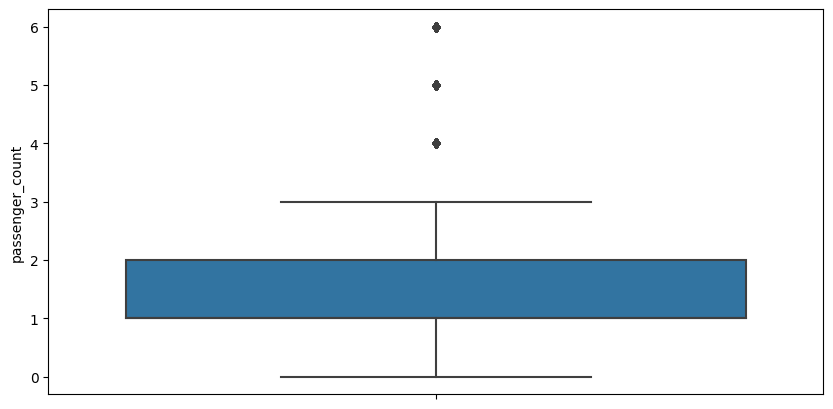

In [51]:
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['passenger_count'])

<AxesSubplot: ylabel='fare_amount'>

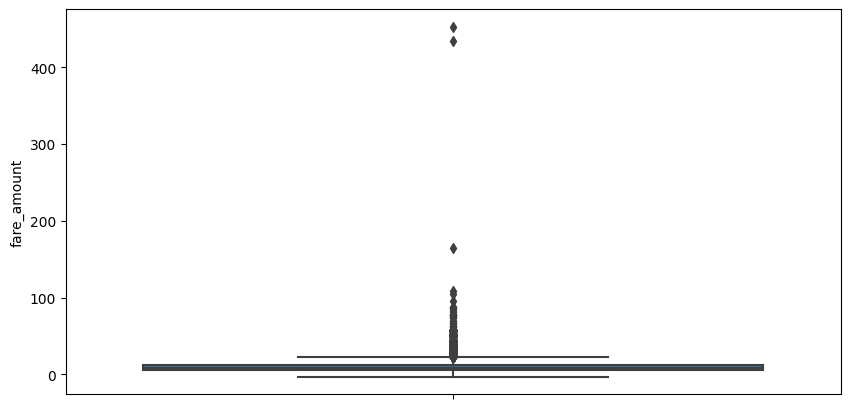

In [52]:
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['fare_amount'])

<AxesSubplot: ylabel='distance'>

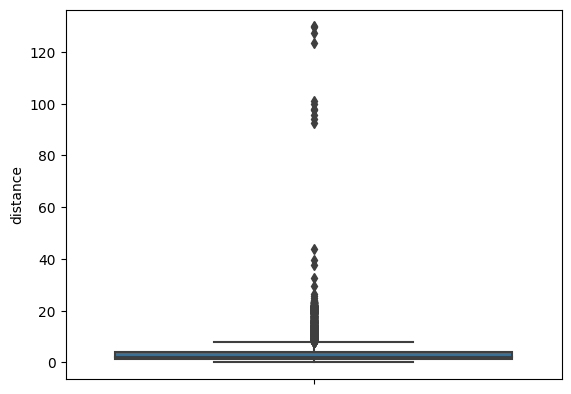

In [53]:
sns.boxplot(y=traindf['distance'])

In [54]:
traindf.describe()

,fare_amount,passenger_count,Hour,minute,date,day,month,year,distance
count,15559.000000,15559.000000,15559.000000,15559.000000,15559.000000,15559.000000,15559.000000,15559.000000,15559.000000
mean,11.362855,1.649829,13.505238,29.661161,15.669452,3.034321,6.268591,2011.738929,3.438704
std,10.649186,1.268497,6.507332,17.296288,8.685559,1.969488,3.448131,1.868156,4.587032
min,-3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2009.000000,0.000111
25%,6.000000,1.000000,9.000000,15.000000,8.000000,1.000000,3.000000,2010.000000,1.275690
50%,8.500000,1.000000,14.000000,30.000000,16.000000,3.000000,6.000000,2012.000000,2.190348
75%,12.500000,2.000000,19.000000,45.000000,23.000000,5.000000,9.000000,2013.000000,3.933774
max,453.000000,6.000000,23.000000,59.000000,31.000000,6.000000,12.000000,2015.000000,129.950482


In [55]:
traindf['passenger_count'] = traindf['passenger_count'].astype('int64')

### Train Test Split

In [79]:
traindf.head(2)

,fare_amount,passenger_count,Hour,minute,date,day,month,year,distance
0,4.5,1,17,26,15,0,6,2009,1.030764
1,16.9,1,16,52,5,1,1,2010,8.450134


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(traindf.drop('fare_amount', axis=1),
                                                   traindf['fare_amount'], test_size=0.4, random_state = 42)

### Model selection

In [81]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=250, criterion='absolute_error')

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predicts = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

### Model Evaluation

In [ ]:
from sklearn.metrics import r2_score

score=r2_score(y_test,predicts)
score

In [ ]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test, predicts))
RMSE